<div style="border-blue: 15px; border-style: solid; border-color: purple;background-color: lightcyan; padding: 15pt">

 # Algoritmo Deutsch-Jozsa
 
  <b>*Alison  Geraldine  Valderrama  Munar*<b>
     </div>


  >   El Algoritmo de Deutsch-Jozsa fue uno de los primeros algoritmos diseñados para ejecutar sobre un computador cuántico y tiene el potencial de ser más eficiente que los algoritmos clásicos.'


  
  

<b>En el problema de Deutsch-Jozsa,consiste en que se tiene una función (que puede considerarse como un oráculo que toma n bits de entrada x1, x2,..., xn y devuelve un valor binario f(x1, x2,..., xn)= 0 ó 1.

 El objetivo es determinar si la función es constante (0 en todas las entradas o 1 en todas las entradas) o balanceada (devuelve 1 para la mitad de las entradas y 0 para la otra mitad). El problema es determinar cómo es la función (constante o balanceada) aplicando entradas a la caja negra y observando su salida.

<p style="background-color:lightgreen; color:blackgreen; padding:20px"> Comezaremos creando un oraculo y con diferentes valores  poder determinar si contienen una funcion constante o balanceada en un 1  solo uso del oraculo.  </p>


<b> Primero trabajaremos con un oraculo que contenga la función $f:\{0, 1\}^3 \longrightarrow \{0, 1\}$. Las cadenas que quiero que tomen valor 1 son: 000, 101, 100 y 110 como lo muestra la imagen.<b>

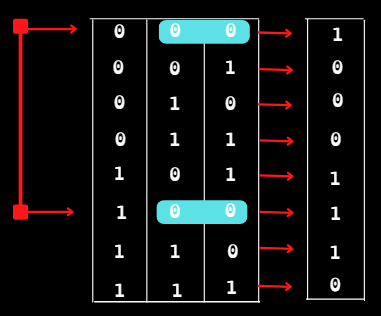

<p style="background-color:lightcyan; color:blue; padding:33px"> Vemos que se podemos simplicar, ya que el valor $|000\rangle$) y $|100\rangle$ tienen en común los dos ultimos ceros y se puede crear un solo tarjet para esos dos<span style="font-size:25px"> 🌟​</span>​.   !!Ahora pasamos a dibujar nuestro circuito en Qiskit y por consiguiente su oráculo correspondiente... </p>

In [2]:
from qiskit import QuantumCircuit

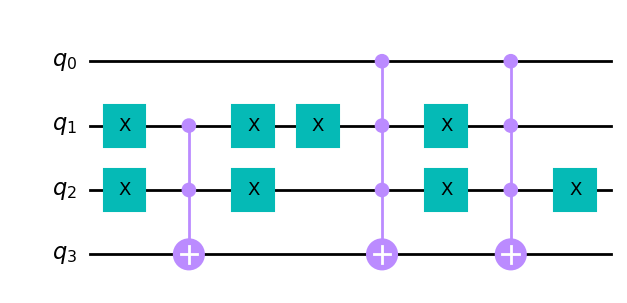

In [3]:
circuito = QuantumCircuit(4)
circuito.x([1, 2])
circuito.ccx(1, 2, 3)
circuito.x([1, 2])
circuito.x(1)
circuito.mct([0, 1, 2], 3)
circuito.x(1)
circuito.x(2)
circuito.mct([0,1,2],3)
circuito.x(2)      
circuito.draw(output='mpl')

In [4]:
from qiskit import QuantumCircuit,transpile

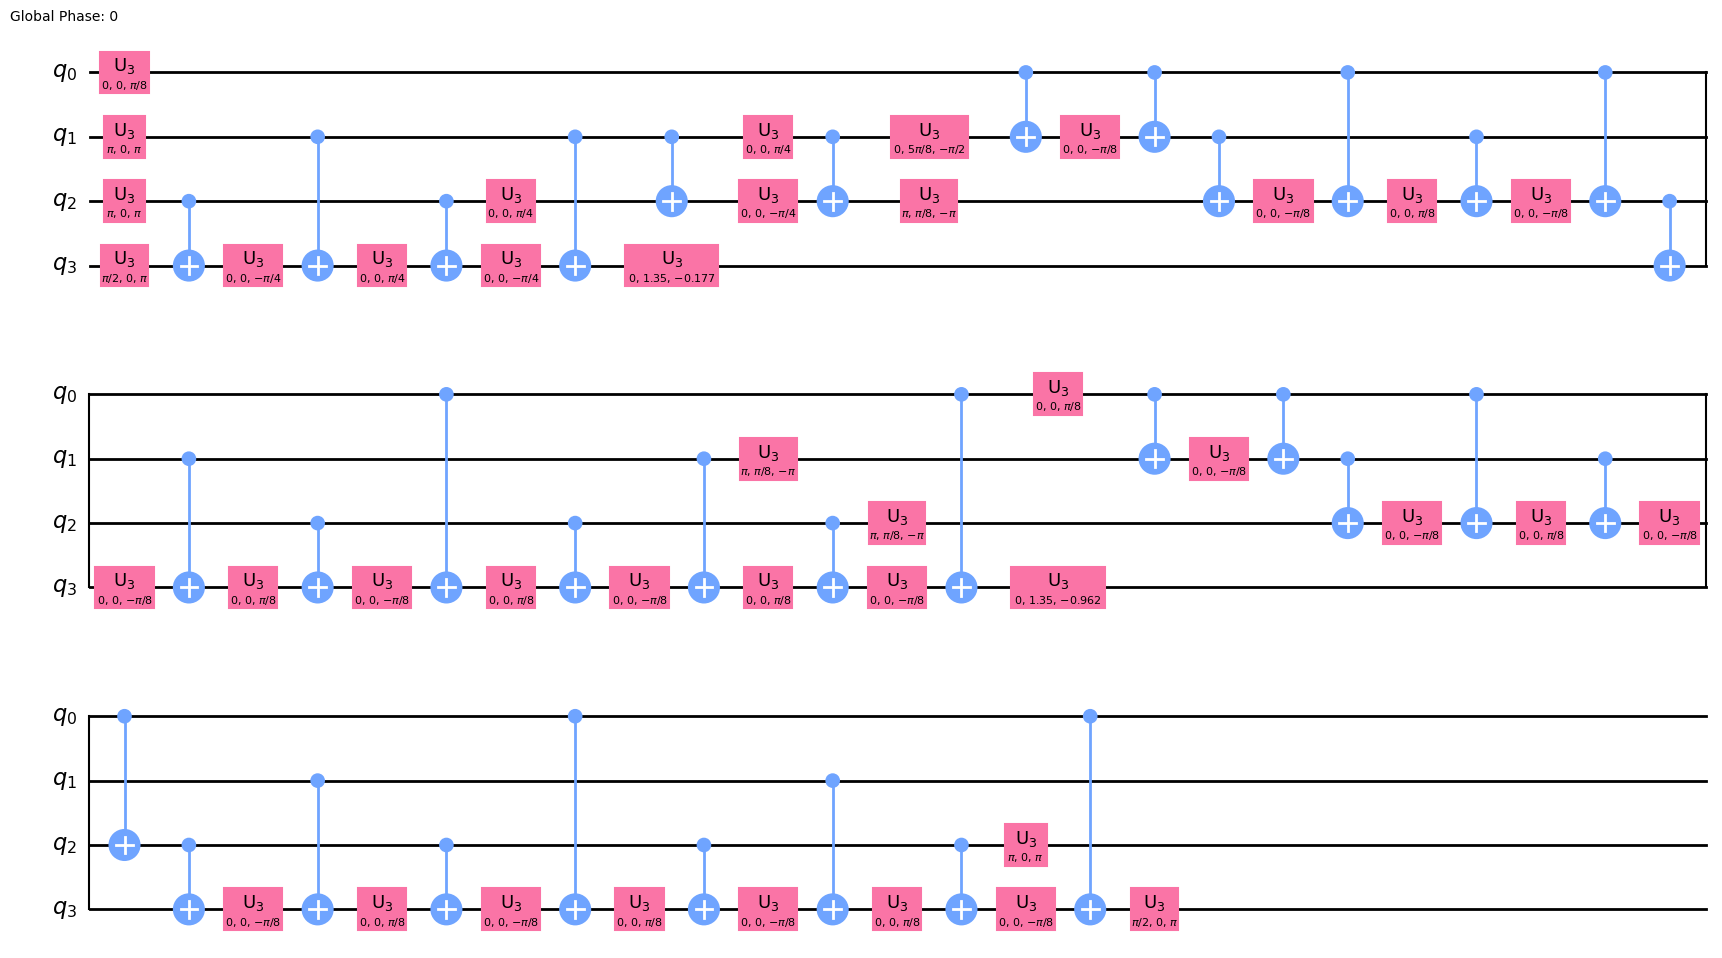

In [5]:
result = transpile(circuito, basis_gates=['u3', 'cx'])
result.draw(output='mpl')

In [6]:
result.count_ops()

OrderedDict([('u3', 41), ('cx', 34)])

In [7]:
costo = result.count_ops()['u3'] + 10*result.count_ops()['cx']

In [8]:
print(costo)

381


In [9]:
orac = circuito.to_gate()
orac.name = ' See you late! '

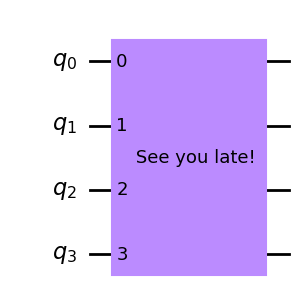

In [10]:
circuito = QuantumCircuit(4)
circuito.append(orac, [0, 1, 2, 3])
circuito.draw(output='mpl')

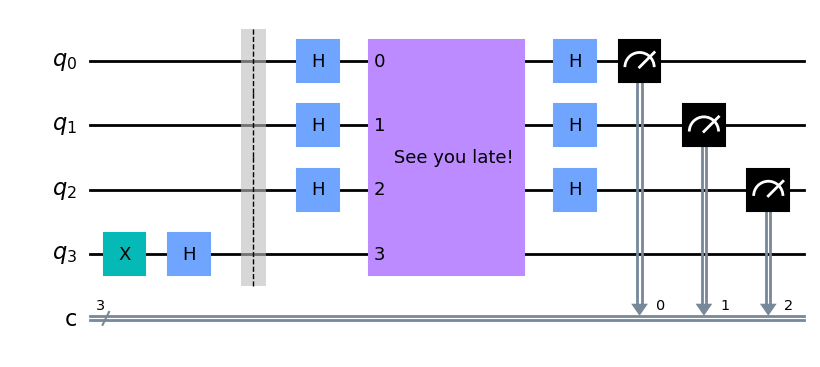

In [11]:
dj = QuantumCircuit(4, 3)
dj.x(3)
dj.h(3)
dj.barrier()
dj.h(range(3))
dj.append(orac,range(4))
dj.h(range(3))
dj.measure(range(3), range(3))
dj.draw(output='mpl')

In [12]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

In [13]:
simulador = Aer.get_backend('qasm_simulator')

In [14]:
ejecucion = execute(dj, backend=simulador, shots=1) 
resultado = ejecucion.result()
conteos = resultado.get_counts()

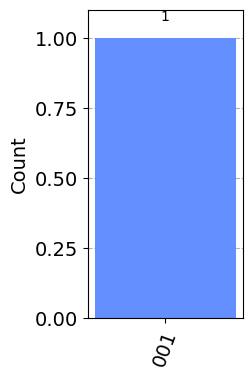

In [15]:
plot_histogram(conteos, figsize=(2,4))

<p style="background-color:lightgreen; color:blanckgreen; padding:20px">Como el resultado de mi circuito es el ket $|100\rangle$) que es diferente al ket $|000\rangle$) podemos determinar que nuestra funcion dentro del oraculo es ¡¡balanceda!!!<span style="font-size:25px"> 😁​</span>!! Que felicidad si nos funciono<span style="font-size:25px">​👏​</span>  </p>

Ahora trabajaremos con un oraculo que contenga la función $f:\{0, 1\}^2 \longrightarrow \{0, 1\}$. Las cadenas que quiero que tomen valor 1 son:  01 y 11 como lo muestra la imagen.

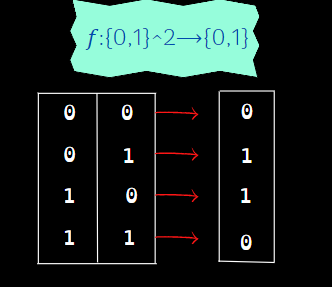

In [16]:
from qiskit import QuantumCircuit

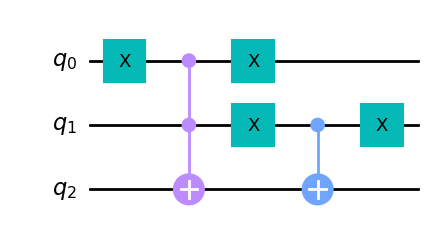

In [21]:
c = QuantumCircuit(3)
c.x(0)
c.mct([0, 1],2)
c.x(0)
c.x(1)
c.mct([1],2)
c.x(1)
c.draw(output='mpl')

In [22]:
from qiskit import QuantumCircuit,transpile

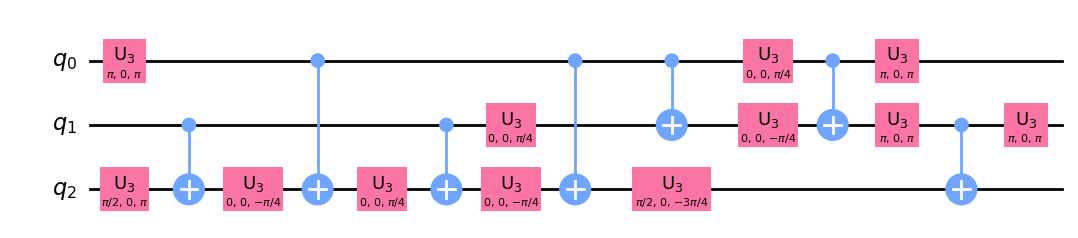

In [23]:
result = transpile(c, basis_gates=['u3', 'cx'])
result.draw(output='mpl')

In [24]:
result.count_ops()

OrderedDict([('u3', 12), ('cx', 7)])

In [25]:
costo = result.count_ops()['u3'] + 10*result.count_ops()['cx']

In [26]:
print(costo)

82


In [27]:
orac = c.to_gate()
orac.name = ' See you late! '

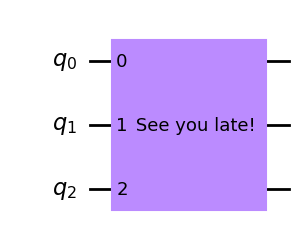

In [28]:
c = QuantumCircuit(3)
c.append(orac, [0, 1, 2])
c.draw(output='mpl')

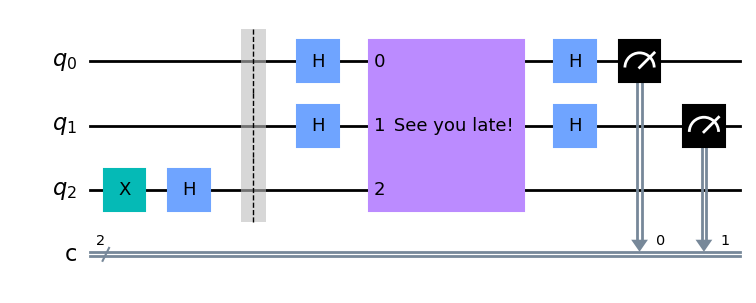

In [29]:
c = QuantumCircuit(3, 2)
c.x(2)
c.h(2)
c.barrier()
c.h(range(2))
c.append(orac, range(3))
c.h(range(2))
c.measure(range(2),range(2))
c.draw(output='mpl')


In [30]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

In [31]:
simulador = Aer.get_backend('qasm_simulator')

In [32]:
ejecucion = execute(c, backend=simulador, shots=1) 
result = ejecucion.result()
conteos = result.get_counts()

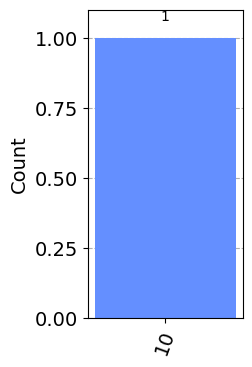

In [35]:
plot_histogram(conteos, figsize=(2,4))

<p style="background-color:lightgreen; color:blanckgreen; padding:20px">Que bueno nuestra segunda funcion tambien es balanceada, ya que nuestro resultado es el  ket $|01\rangle$) que es diferente al ket $|00\rangle$) por esa razon podemos afirmar que nuestra funcion dentro del oraculo es ¡¡balanceda!!!<span style="font-size:25px"> 😁​</span>
    

Ahora trabajaremos con un oraculo que contenga la función $f:\{0, 1\}^4 \longrightarrow \{0, 1\}$. Las cadenas que quiero que tomen valor 1 son: 0000, 0010, 0100, 1000, 1001, 1011, 1101 y 1110 y como lo muestra la imagen.

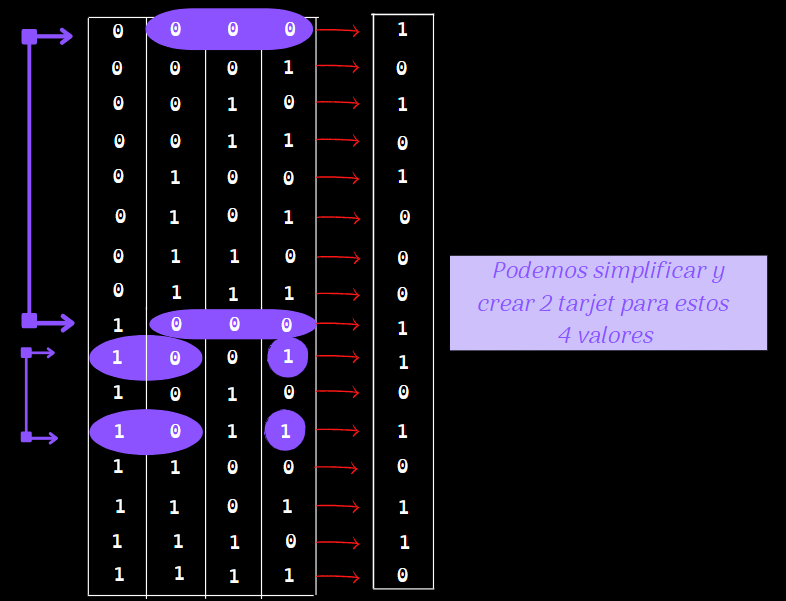

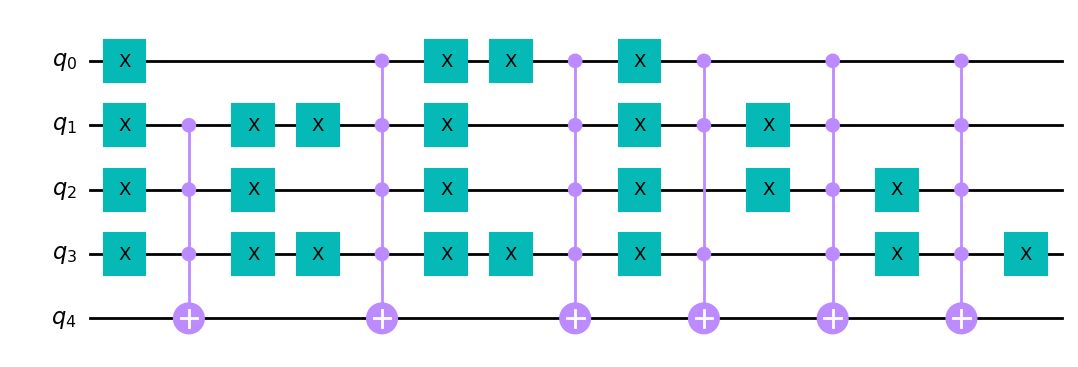

In [36]:
circuito = QuantumCircuit(5)
circuito.x([1,2,3])
circuito.mct([1,2,3],4)
circuito.x([1,2,3])

circuito.x([0,1,3])
circuito.mct([0,1,2,3],4)
circuito.x([0,1,3])

circuito.x([0,2,3])
circuito.mct([0,1,2,3],4)
circuito.x([0,2,3])

circuito.x(1)
circuito.mct([0,1,3],4)
circuito.x(1)

circuito.x(2)
circuito.mct([0,1,2,3],4)
circuito.x(2)
circuito.x(3)
circuito.mct([0,1,2,3],4)
circuito.x(3)
circuito.draw(output='mpl')

In [37]:
from qiskit import QuantumCircuit,transpile

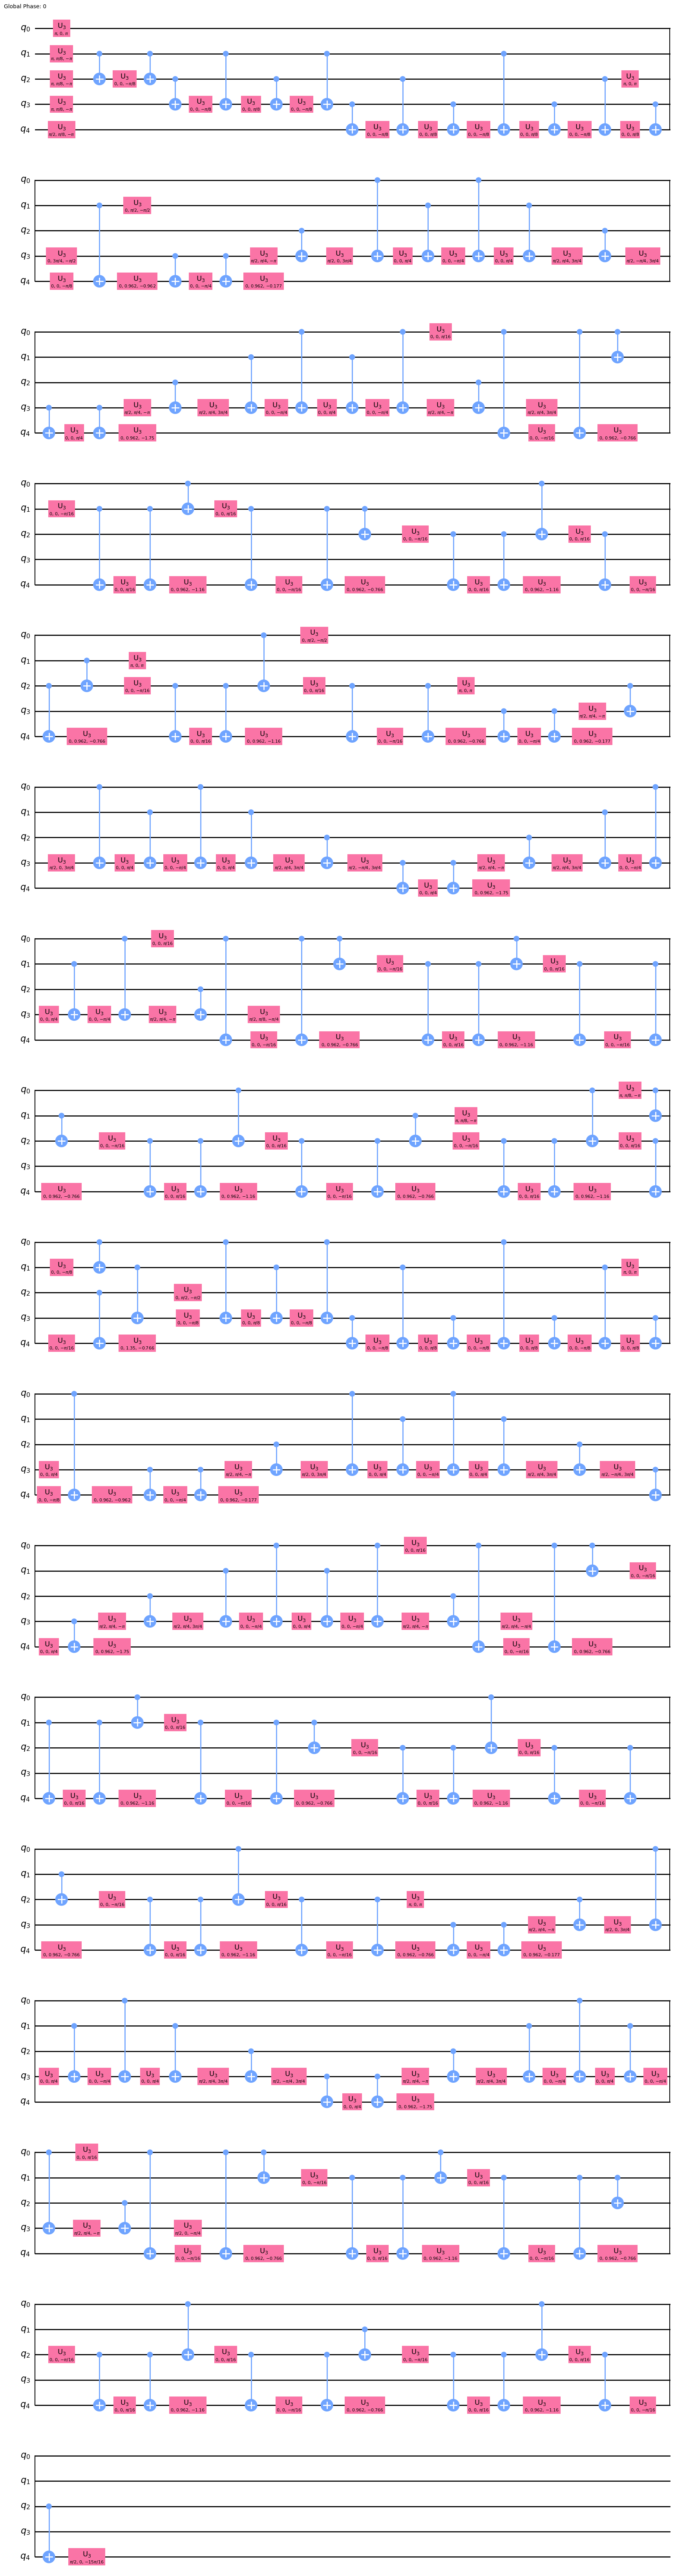

In [38]:
result = transpile(circuito, basis_gates=['u3', 'cx'])
result.draw(output='mpl')

In [39]:
result.count_ops()

OrderedDict([('u3', 197), ('cx', 172)])

In [40]:

costo = result.count_ops()['u3'] + 10*result.count_ops()['cx']

In [41]:
print(costo)

1917


In [42]:
orac = circuito.to_gate()
orac.name ='See you late!'

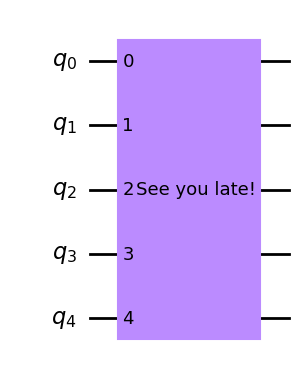

In [43]:
circuito = QuantumCircuit(5)
circuito.append(orac, [0, 1, 2, 3, 4])
circuito.draw(output='mpl')

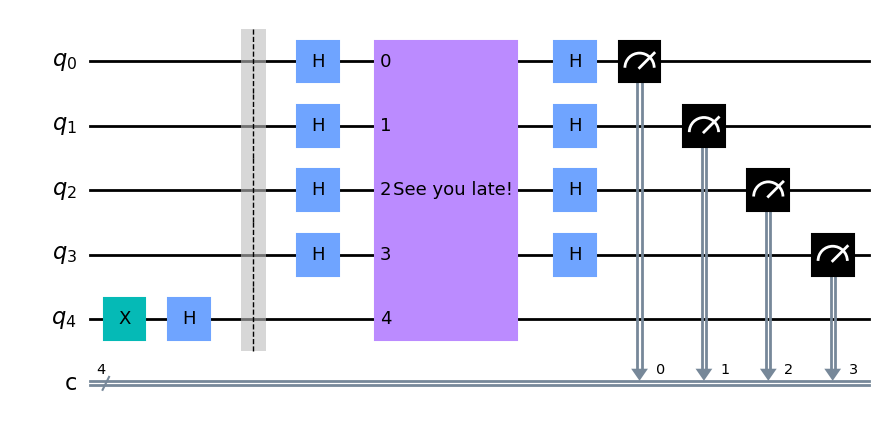

In [50]:
c = QuantumCircuit(5, 4)
c.x(4)
c.h(4)
c.barrier()
c.h(range(4))
c.append(orac, range(5))
c.h(range(4))
c.measure(range(4), range(4))
c.draw(output='mpl')

In [51]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

In [52]:
simulador = Aer.get_backend('qasm_simulator')

In [53]:
ejecucion = execute(c, backend=simulador, shots=1) 
result = ejecucion.result()
conteos = result.get_counts()

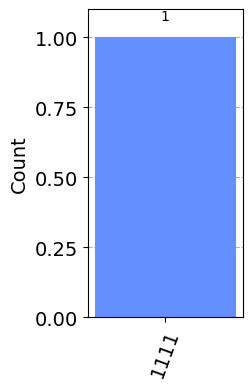

In [54]:
plot_histogram(conteos, figsize=(2,4))

<p style="background-color:lightgreen; color:blanckgreen; padding:20px">Nuestra tercera funcion tambien es ¡¡balanceada!! ya que nuestro resultado es el  ket $|1111\rangle$) que es diferente al ket $|0000\rangle$<span style="font-size:25px"> 😁​</span>
    

Podemos concluir que las funciones que evaluamos todas nos dieron balanceadas.

# Referencias

 <a id =division_ID >Deutsch, David; Jozsa, Richard (1992). «Rapid solutions of problems by quantum computation». Proceedings of the Royal Society of London A. 439 (1907): 553–558. Bibcode:1992RSPSA.439..553D. doi:10.1098/rspa.1992.0167.
 
 <a id =division_ID >Johansson, N.; Larsson, JÅ. (2017). «Efficient classical simulation of the Deutsch–Jozsa and Simon's algorithms». Quantum Inf Process (2017) 16: 233. Bibcode:2017QuIP...16..233J. doi:10.1007/s11128-017-1679-7.